## Apriori Demo

In [45]:
# Import libraries

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Load dataset and view 
data = pd.read_csv('Groceries_dataset.csv')

display(data.head())
print(data.info())
print(data.shape)
print(data.keys())

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None
(38765, 3)
Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


In [32]:
# Count number of unqiue customers

print('Total Member_number entries\t',  len(data['Member_number']))
print('Unique Member_number entries\t', len(data['Member_number'].unique()))

Total Member_number entries	 38765
Unique Member_number entries	 3898


In [38]:
# Group data by 'Member_number'
grouped = data.groupby('Member_number')['itemDescription'].apply(list).reset_index()

In [39]:
# One hot encode data
te = TransactionEncoder()
te_fit = te.fit(grouped['itemDescription']).transform(grouped['itemDescription'])

encoded_data = pd.DataFrame(te_fit, columns=te.columns_)

display(encoded_data)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [63]:
# Apply Apriori algorithm
frequent_item_sets = apriori(encoded_data, min_support=0.01, use_colnames=True)
frequent_item_sets_to_plot = frequent_item_sets.head(20)

# Get rules
rules = association_rules(frequent_item_sets, metric='lift', min_threshold=1)
rules_to_plot = rules.head(20)

In [61]:
# Display results!

display(frequent_item_sets)
display(rules)

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)
...,...,...
3011,0.011031,"(yogurt, whipped/sour cream, whole milk, soda)"
3012,0.010518,"(bottled water, whole milk, other vegetables, ..."
3013,0.013597,"(yogurt, whole milk, other vegetables, sausage..."
3014,0.010005,"(shopping bags, whole milk, other vegetables, ..."


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,1.0,0.001133,1.016672,0.116940,0.056088,0.016399,0.110985
1,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,1.0,0.001133,1.010396,0.122392,0.056088,0.010289,0.110985
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,1.0,0.002413,1.016769,0.192815,0.066897,0.016492,0.141621
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,1.0,0.002413,1.037933,0.176014,0.066897,0.036547,0.141621
4,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,1.0,0.004517,1.023477,0.269801,0.078598,0.022939,0.185441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15255,(whole milk),"(yogurt, rolls/buns, other vegetables, soda)",0.458184,0.020010,0.013597,0.029675,1.483002,1.0,0.004428,1.009961,0.601111,0.029266,0.009862,0.354581
15256,(other vegetables),"(yogurt, rolls/buns, soda, whole milk)",0.376603,0.024628,0.013597,0.036104,1.465954,1.0,0.004322,1.011905,0.509869,0.035076,0.011765,0.294093
15257,(yogurt),"(rolls/buns, other vegetables, soda, whole milk)",0.282966,0.031811,0.013597,0.048051,1.510499,1.0,0.004595,1.017059,0.471340,0.045145,0.016773,0.237735
15258,(rolls/buns),"(yogurt, other vegetables, soda, whole milk)",0.349666,0.027963,0.013597,0.038885,1.390578,1.0,0.003819,1.011364,0.431893,0.037350,0.011236,0.262562


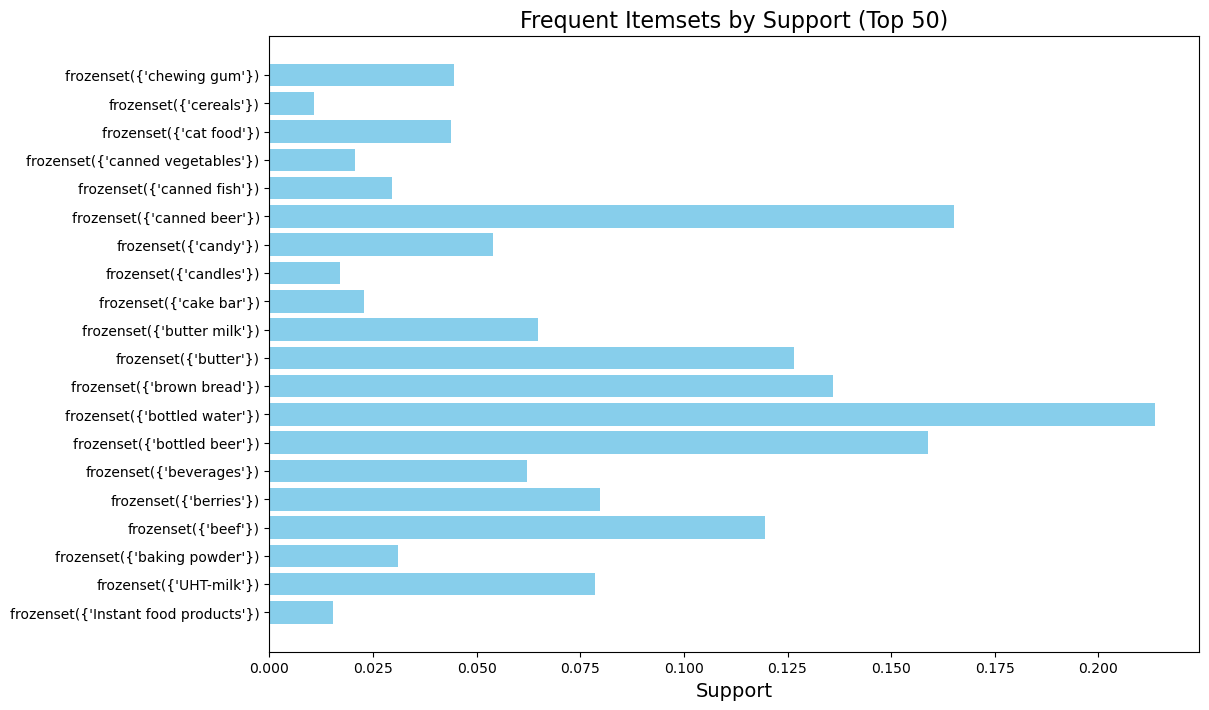

In [72]:
# Visualization 1: Plot Frequent Itemsets by Support (with limited itemsets)
plt.figure(figsize=(12, 8))

# Plotting the support values for the top frequent itemsets
plt.barh(frequent_item_sets_to_plot['itemsets'].astype(str), frequent_item_sets_to_plot['support'], color='skyblue')

# Labeling the axes
plt.xlabel('Support', fontsize=14)
plt.title('Frequent Itemsets by Support (Top 50)', fontsize=16)

# Adjust y-ticks to remove itemset names (for better legibility)
plt.yticks(range(len(frequent_item_sets_to_plot)))

# Show the plot
plt.show()

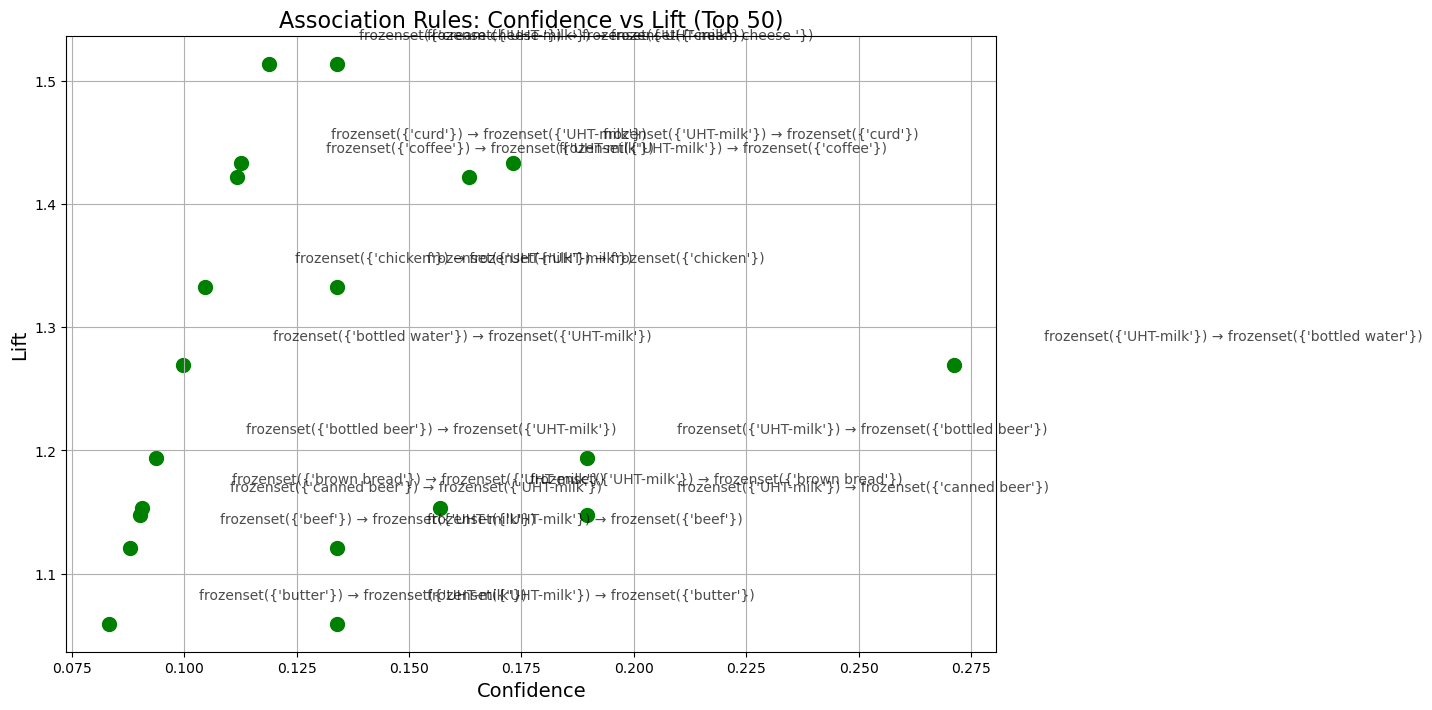

In [67]:
# Visualization 2: Plot Confidence vs Lift for Association Rules (improved legibility)
plt.figure(figsize=(12, 8))

# Scatter plot for Confidence vs Lift
plt.scatter(rules_to_plot['confidence'], rules_to_plot['lift'], color='green', s=100)

# Adding text labels with a smaller font size to avoid overlap
for i, row in rules_to_plot.iterrows():
    rule_label = f"{str(row['antecedents'])} → {str(row['consequents'])}"
    plt.text(row['confidence'] + 0.02, row['lift'] + 0.02, rule_label,
             fontsize=10, alpha=0.7)  # Smaller font size for readability

# Labeling the axes
plt.xlabel('Confidence', fontsize=14)
plt.ylabel('Lift', fontsize=14)

# Title and grid for better visibility
plt.title('Association Rules: Confidence vs Lift (Top 50)', fontsize=16)
plt.grid(True)

# Show the plot
plt.show()


apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)

<span style="font-size: 15px;">

- df: Type: DataFrame The DataFrame should be in a one-hot encoded format (binary format). Each column is an item, and each row is a transaction.

- min_support: Type: float (default: 0.5) Minimum support value for an itemset to be considered frequent. Support is the proportion of transactions that contain the itemset. Example: min_support=0.01 means that for an itemset to be considered frequent, it must appear in at least 1% of the transactions.

- use_colnames: Type: boolean (default: False) If True, the returned DataFrame will use the actual item names (from the original DataFrame column names) instead of column indices.

- max_len: Type: int (optional) Maximum length of the itemsets to be generated. If specified, only itemsets of this size or smaller will be returned.

- verbose: Type: int (default: 0) If 1, progress updates will be printed during execution (useful for large datasets).

- low_memory: Type: boolean (default: False) If True, uses less memory but might run slower. Recommended for very large datasets.
</span>

association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8, support_only=False)

<span style="font-size: 15px;">

- frequent_itemsets: Type: DataFrame The DataFrame returned from apriori() containing frequent itemsets.

- metric: Type: string (default: 'confidence') This is the metric used to evaluate the strength of the rules. Common options: 'support': The proportion of transactions that contain the rule (antecedent + consequent). 'confidence': How often the rule is true (i.e., if the antecedent happens, how often does the consequent happen?). 'lift': The ratio of the observed support to the expected support if the antecedent and consequent were independent. 'leverage': Measures the difference between observed support and expected support if antecedent and consequent were independent. 'conviction': A measure of the rule’s strength.

- min_threshold: Type: float (default: 0.8) Minimum value for the selected metric (confidence, lift, etc.) that a rule must meet to be considered. For example, min_threshold=0.8 means that the rule should have a confidence of at least 80%.

- support_only: Type: boolean (default: False) If True, only the support metric is calculated and returned. No other metrics are computed.
</span>